In [1]:
import numpy as np
import math
from osgeo import gdal, ogr, osr, gdal_array
import os
import random
import matplotlib.pyplot as plt

In [2]:
R = 10

arr1 = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr1.shape[0]
ncols = arr1.shape[1]
arr1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [3]:
ncols

21

In [4]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr1[x][y] = z
        except ValueError:
            pass

#arr1
print(np.array_str(arr1, precision=1))

[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1.7  3.2  3.9  4.2  4.4  4.2  3.9  3.2
   1.7  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   3.3  4.5  5.2  5.7  5.9  6.   5.9  5.7  5.2
   4.5  3.3  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   1.4  3.9  5.1  5.9  6.5  6.9  7.1  7.1  7.1  6.9  6.5
   5.9  5.1  3.9  1.4  0.   0.   0. ]
 [ 0.   0.   0.   3.9  5.3  6.2  6.9  7.4  7.7  7.9  8.   7.9  7.7  7.4
   6.9  6.2  5.3  3.9  0.   0.   0. ]
 [ 0.   0.   3.3  5.1  6.2  7.1  7.7  8.1  8.4  8.6  8.7  8.6  8.4  8.1
   7.7  7.1  6.2  5.1  3.3  0.   0. ]
 [ 0.   1.7  4.5  5.9  6.9  7.7  8.2  8.7  8.9  9.1  9.2  9.1  8.9  8.7
   8.2  7.7  6.9  5.9  4.5  1.7  0. ]
 [ 0.   3.2  5.2  6.5  7.4  8.1  8.7  9.1  9.3  9.5  9.5  9.5  9.3  9.1
   8.7  8.1  7.4  6.5  5.2  3.2  0. ]
 [ 0.   3.9  5.7  6.9  7.7  8.4  8.9  9.3  9.6  9.7  9.8  9.7  9.6  9.3
   8.9  8.4  7.7  6.9  5.7  3.9  0. ]
 [ 0.   4.2

In [5]:
print(np.max(arr1), np.min(arr1))

10.0 0.0


7.0710678118654755

In [6]:
arr1[0][0]

arr2 = np.copy(arr1)

In [7]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_k = arr1 + arr_n
arr_k

array([[-8.70907984e-01, -1.29417262e+00, -9.17595827e-01,
        -1.08124786e+00,  9.45448658e-01,  2.41341410e-01,
         9.32776662e-01, -2.08500693e+00,  1.65750763e+00,
         1.77853051e-01, -3.42440167e-01,  6.47982268e-01,
        -1.66771207e+00,  1.25853167e+00,  1.67162864e-01,
        -5.44133619e-01,  2.18689795e+00,  6.09664142e-01,
         1.64155768e+00, -1.01404017e+00, -6.88180636e-01],
       [ 1.21851266e+00, -3.18687966e-01,  8.16808440e-01,
        -1.30112581e+00,  1.24172071e+00, -7.90154439e-01,
         1.33457657e+00,  3.70605656e+00,  2.40044849e+00,
         5.00911655e+00,  5.67770156e+00,  5.80833031e+00,
         4.49703178e+00,  3.81125195e+00,  1.51490708e+00,
        -6.03078931e-03, -3.50405031e-01,  8.20077324e-01,
         2.90403026e-01,  1.47924962e+00, -1.32540417e+00],
       [ 1.41852113e+00, -1.35849572e+00, -3.76349276e-01,
        -4.42844060e-02, -9.18203088e-01,  3.29585509e+00,
         5.56685991e+00,  4.21559052e+00,  3.82080543e

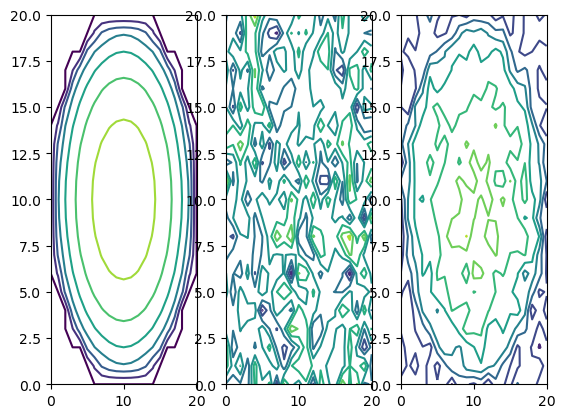

In [8]:
fig, ax = plt.subplots(1, 3)
ax[0].contour(arr1)
ax[1].contour(arr_n)
ax[2].contour(arr_k)
plt.show()

In [10]:
#difference (clear-noisy)
np.subtract(arr1, arr_k)

array([[ 0.87090798,  1.29417262,  0.91759583,  1.08124786, -0.94544866,
        -0.24134141, -0.93277666,  2.08500693, -1.65750763, -0.17785305,
         0.34244017, -0.64798227,  1.66771207, -1.25853167, -0.16716286,
         0.54413362, -2.18689795, -0.60966414, -1.64155768,  1.01404017,
         0.68818064],
       [-1.21851266,  0.31868797, -0.81680844,  1.30112581, -1.24172071,
         0.79015444,  0.39747423, -0.5437789 ,  1.47253486, -0.76647586,
        -1.31880261, -1.56568962, -0.62404843, -0.64897429,  0.21714373,
         0.00603079,  0.35040503, -0.82007732, -0.29040303, -1.47924962,
         1.32540417],
       [-1.41852113,  1.35849572,  0.37634928,  0.04428441,  0.91820309,
         0.0207697 , -1.09472396,  0.9805619 ,  1.83604882,  1.24490301,
         0.07561609, -1.17870293,  0.95144633, -0.1055979 , -0.67835573,
         0.19220738,  0.45075247, -1.18938427,  0.24990318,  2.24087217,
         0.48747049],
       [ 0.3890038 ,  0.73624864, -0.05773654,  0.33031307

In [27]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemisphere_100.tif', ncols, nrows, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr1)
# gtiff.FlushCache()
gtiff = None

In [18]:
#hemicylinder
R = 100

arr_c = np.zeros((int(4*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

arr_c

array([[ 0.        , 14.10673598, 19.89974874, ..., 19.89974874,
        14.10673598,  0.        ],
       [ 0.        , 14.10673598, 19.89974874, ..., 19.89974874,
        14.10673598,  0.        ],
       [ 0.        , 14.10673598, 19.89974874, ..., 19.89974874,
        14.10673598,  0.        ],
       ...,
       [ 0.        , 14.10673598, 19.89974874, ..., 19.89974874,
        14.10673598,  0.        ],
       [ 0.        , 14.10673598, 19.89974874, ..., 19.89974874,
        14.10673598,  0.        ],
       [ 0.        , 14.10673598, 19.89974874, ..., 19.89974874,
        14.10673598,  0.        ]])

In [19]:
np.max(arr_c)

100.0

In [20]:
driver = gdal.GetDriverByName('GTiff')

gtiff = driver.Create('C:/Users/sasha/dem_filter/hemicylinder_test.tif', ncols, nrows, 1, gdal.GDT_Float32)
#gtiff.SetGeoTransform(gtf)
#gtiff.SetProjection(proj)
gtiff.GetRasterBand(1).WriteArray(arr_c)
# gtiff.FlushCache()
gtiff = None